In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AirPassengers.csv')

In [3]:
data.shape

(144, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
data['Month'] = pd.to_datetime(data['Month'])

In [7]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
data['Month_'] = data['Month'].dt.month

In [10]:
data['Year'] = data['Month'].dt.year

In [11]:
data['Day'] = data['Month'].dt.day

In [12]:
data

,Month,#Passengers,Month_,Year,Day
0,1949-01-01,112,1,1949,1
1,1949-02-01,118,2,1949,1
2,1949-03-01,132,3,1949,1
3,1949-04-01,129,4,1949,1
4,1949-05-01,121,5,1949,1
...,...,...,...,...,...
139,1960-08-01,606,8,1960,1
140,1960-09-01,508,9,1960,1
141,1960-10-01,461,10,1960,1
142,1960-11-01,390,11,1960,1


In [13]:
data = data.set_index('Month')

In [14]:
data.columns

Index(['#Passengers', 'Month_', 'Year', 'Day'], dtype='object')

In [15]:
data

,#Passengers,Month_,Year,Day
Month,,,,
1949-01-01,112,1,1949,1
1949-02-01,118,2,1949,1
1949-03-01,132,3,1949,1
1949-04-01,129,4,1949,1
1949-05-01,121,5,1949,1
...,...,...,...,...
1960-08-01,606,8,1960,1
1960-09-01,508,9,1960,1
1960-10-01,461,10,1960,1


In [16]:
data.loc['1949-01-01':'1949-12-01']

,#Passengers,Month_,Year,Day
Month,,,,
1949-01-01,112,1,1949,1
1949-02-01,118,2,1949,1
1949-03-01,132,3,1949,1
1949-04-01,129,4,1949,1
1949-05-01,121,5,1949,1
1949-06-01,135,6,1949,1
1949-07-01,148,7,1949,1
1949-08-01,148,8,1949,1
1949-09-01,136,9,1949,1


In [17]:
data = data.drop(columns = ['Month_', 'Day', 'Year'])

<AxesSubplot:xlabel='Month'>

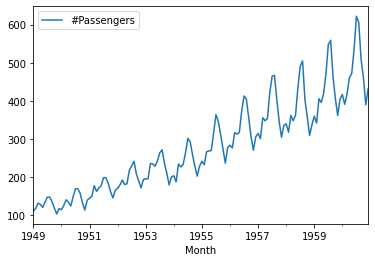

In [18]:
data.plot()

In [19]:
mean_log = data.rolling(window = 12).mean()
std_log = data.rolling(window = 12).std()

In [21]:
mean_log[:20]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


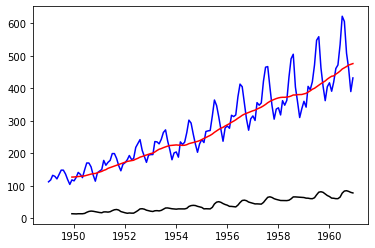

In [38]:
plt.plot(data, color = 'blue')
plt.plot(mean_log, color = 'red')
plt.plot(std_log, color = 'black')

plt.show()

Before building a time series model, we need to make sure that the time series is stationary. If the time series is not stationary, we need to make it stationary by differencing the data. The number of times we take a difference of the data is going to be taken as a parameter in ARIMA model which we will see later.

Non-stationary in time series could be because of following reasons :
1. Presence of a trend.
2. Presence of auto correlation.
3. Presence of heterosdasticity.

We can indentify non-stationary time series data using the augmented Dicky-Fuller Test

In [25]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])

In [26]:
print(result)

(0.8153688792060488, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


**If the p-value is < 0.05, then it is stationary otherwise it is non-stationary**

In [27]:
first_log = np.log(data)
first_log.dropna(inplace = True)

<AxesSubplot:xlabel='Month'>

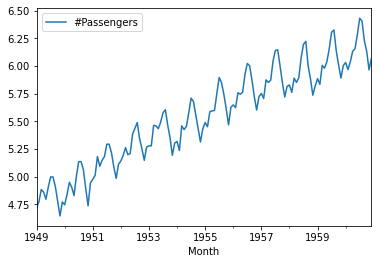

In [28]:
first_log.plot()

In [29]:
result_2 = adfuller(first_log['#Passengers'])
result_2

(-1.7170170891069598,
 0.4223667747703916,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

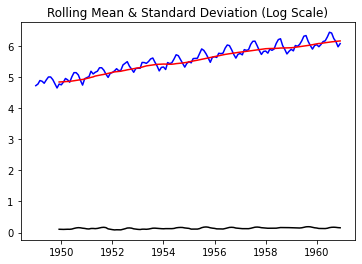

In [31]:
mean_log = first_log.rolling(window = 12).mean()
std_log = first_log.rolling(window = 12).std()

plt.plot(first_log, color = 'b')
plt.plot(mean_log, color = 'r')
plt.plot(std_log, color = 'k')
plt.title('Rolling Mean & Standard Deviation (Log Scale)')
plt.show()

In [32]:
new_data = first_log - mean_log
new_data.dropna(inplace = True)

In [33]:
result_3 = adfuller(new_data['#Passengers'])
result_3

(-3.162907991300866,
 0.022234630001243334,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747034)

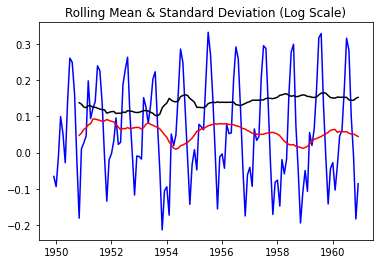

In [34]:
mean_log = new_data.rolling(window = 12).mean()
std_log = new_data.rolling(window = 12).std()

plt.plot(new_data, color = 'b')
plt.plot(mean_log, color = 'r')
plt.plot(std_log, color = 'k')
plt.title('Rolling Mean & Standard Deviation (Log Scale)')
plt.show()

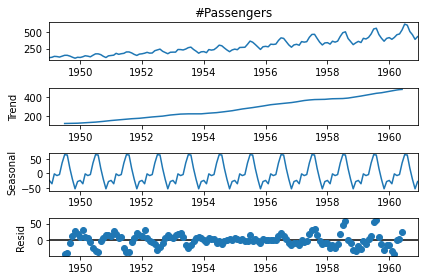

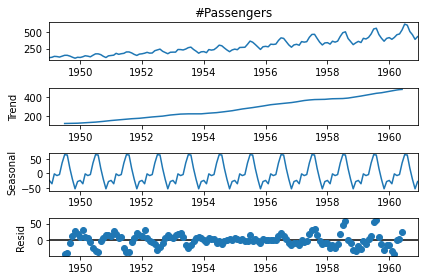

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(data['#Passengers'].dropna())

decompose_result.plot()

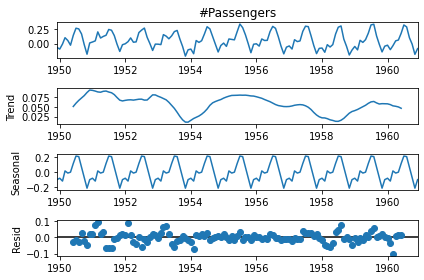

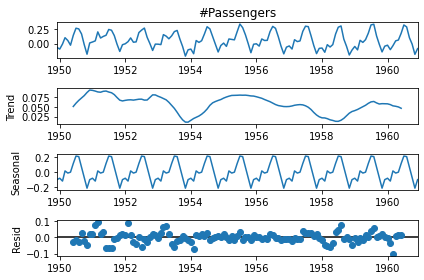

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_2 = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result_2.plot()

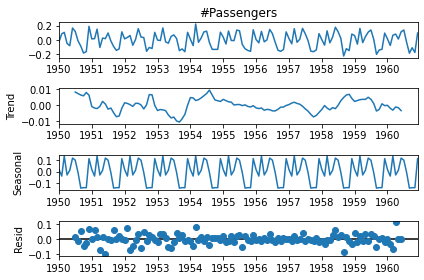

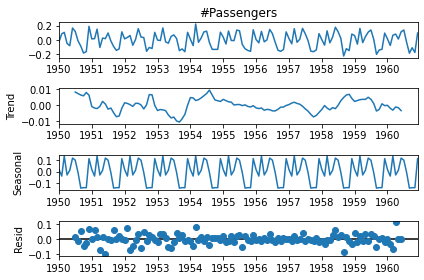

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_3 = seasonal_decompose(new_data['#Passengers'].diff().dropna())

decompose_result_3.plot()

In [42]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


**ACF(Auto correlation Function)** and **PACF(Partial Autocorrelation Function)** are used to identify the order of the model in ARIMA models.

In [49]:
import warnings 
warnings.filterwarnings('ignore')

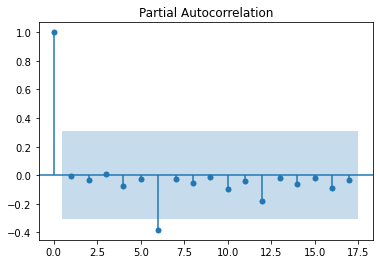

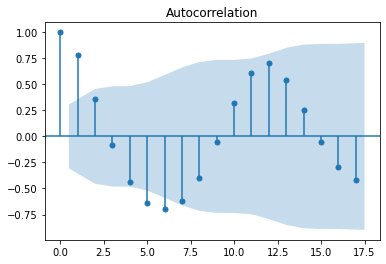

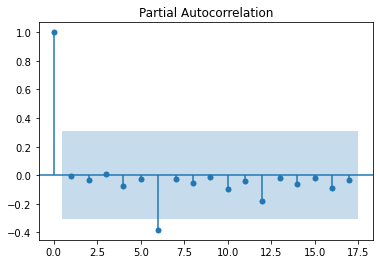

In [50]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(new_data)
pacf_plot=pacf(new_data)
plot_acf(acf_plot)
plot_pacf(pacf_plot)

In [44]:
from statsmodels.tsa.arima_model import ARIMA

train = new_data.iloc[0:120]['#Passengers']
test = new_data.iloc[120:]['#Passengers']

In [47]:
train.shape

(120,)

In [51]:
model = ARIMA(train, order = (1,0,2))
model_trained = model.fit()

In [52]:
len(train)

120

In [53]:
len(new_data)-1

132

In [54]:
new_data['predicted'] = model_trained.predict(start = len(train), end = len(new_data)-1, dynamic = True)

In [59]:
new_data['predicted'][120:]

Month
1959-12-01   -0.108295
1960-01-01   -0.005483
1960-02-01    0.028164
1960-03-01    0.042709
1960-04-01    0.048996
1960-05-01    0.051713
1960-06-01    0.052888
1960-07-01    0.053396
1960-08-01    0.053615
1960-09-01    0.053710
1960-10-01    0.053751
1960-11-01    0.053769
1960-12-01    0.053776
Name: predicted, dtype: float64

In [60]:
new_data[['#Passengers', 'predicted']].tail(13)

,#Passengers,predicted
Month,,
1959-12-01,-0.044481,-0.108295
1960-01-01,-0.027530,-0.005483
1960-02-01,-0.103067,0.028164
1960-03-01,-0.036530,0.042709
1960-04-01,0.046332,0.048996
1960-05-01,0.060186,0.051713
1960-06-01,0.175033,0.052888
1960-07-01,0.315151,0.053396
1960-08-01,0.282363,0.053615


<AxesSubplot:xlabel='Month'>

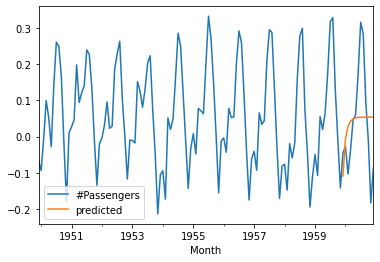

In [63]:
new_data[['#Passengers', 'predicted']].plot()

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order = (1,0,2), seasonal_order = (1,0,2,12))

model = model.fit()

In [66]:
new_data['predicted'] = model.predict(start = len(train), end = len(new_data)-1, dynamic = True)

<AxesSubplot:xlabel='Month'>

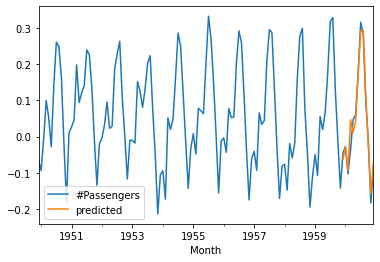

In [67]:
new_data[['#Passengers', 'predicted']].plot()

In [75]:
forecasted_results = model.forecast(steps = 24)

<AxesSubplot:xlabel='Month'>

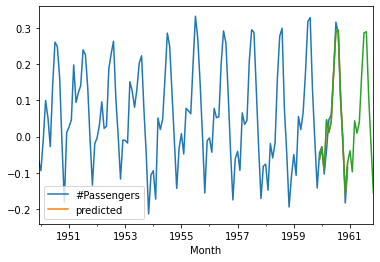

In [76]:
new_data.plot()
forecasted_results.plot()

<AxesSubplot:>

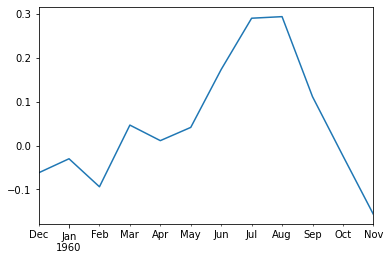

In [69]:
forecasted_results.plot()